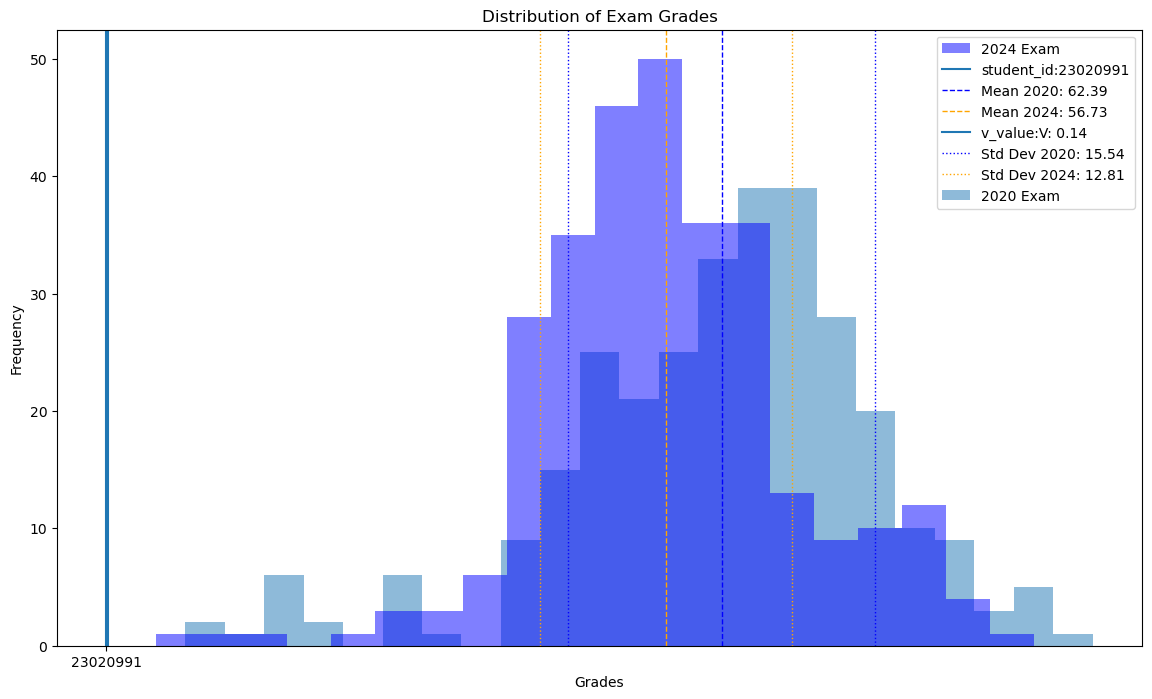

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV files
data_2020 = pd.read_csv(r'C:\Users\Dell\Desktop\2020input1.csv', delimiter='\s+', header=None, names=['Left', 'Right', 'Count'])
data_2024 = pd.read_csv(r'C:\Users\Dell\Desktop\2024input1.csv', header=None, names=['Grades'])

# Calculate midpoints of intervals for 2020 distribution
midpoints_2020 = (data_2020['Left'] + data_2020['Right']) / 2

# Calculate bin heights for 2020 distribution
bin_edges = list(data_2020['Left']) + [data_2020['Right'].iloc[-1]]
bin_heights = data_2020['Count']

id_number = '23020991'
last_digit = int(id_number[-1])
if last_digit == 1:
    v_value = np.sum(data_2024['Grades'] >= 70) / len(data_2024)
    v_label = f'V: {v_value:.2f}'

# Plot histogram for 2020 distribution
plt.figure(figsize=(14, 8))
plt.bar(midpoints_2020, bin_heights, width=np.diff(bin_edges), alpha=0.5, label='2020 Exam')

# Plot histogram for 2024 distribution
plt.hist(data_2024['Grades'],color='blue', bins=20, alpha=0.5, label='2024 Exam')

# Calculate mean values and standard deviations
mean_2020 = np.average(midpoints_2020, weights=data_2020['Count'])
std_dev_2020 = np.sqrt(np.average((midpoints_2020 - mean_2020) ** 2, weights=data_2020['Count']))

mean_2024 = np.mean(data_2024['Grades'])
std_dev_2024 = np.std(data_2024['Grades'])

# Plot mean values and standard deviations
plt.axvline(student_id, label=f'student_id:{student_id}')
plt.axvline(mean_2020, color='blue', linestyle='dashed', linewidth=1, label=f'Mean 2020: {mean_2020:.2f}')
plt.axvline(mean_2024, color='orange', linestyle='dashed', linewidth=1, label=f'Mean 2024: {mean_2024:.2f}')
plt.axvline(v_value,label=f'v_value:{v_label}')
plt.axvline(mean_2020 + std_dev_2020, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev 2020: {std_dev_2020:.2f}')
plt.axvline(mean_2020 - std_dev_2020, color='blue', linestyle='dotted', linewidth=1)
plt.axvline(mean_2024 + std_dev_2024, color='orange', linestyle='dotted', linewidth=1, label=f'Std Dev 2024: {std_dev_2024:.2f}')
plt.axvline(mean_2024 - std_dev_2024, color='orange', linestyle='dotted', linewidth=1)



plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Grades')
plt.legend()

# Save plot as PNG image
plt.savefig('your_id_number.png')

plt.show()
